In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# data import

data = pd.read_csv("Crop_raw_data.csv")

In [ ]:
# display first few rows of data

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
# rows and columns

data.shape

(2200, 8)

In [ ]:
# statistical description

data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
# unique values in each column

data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
# Data Cleaning
 
data = data.rename(columns = {'N':'Nitrogen',
                              'P':'Phosphorous',
                              'K':'Potassium',
                              'temperature':'Temperature',
                              'humidity':'Humidity',
                              'ph':'pH',
                              'rainfall':'Rainfall',
                              'label':'Crop_Label'
                              })

data.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'Temperature', 'Humidity', 'pH',
       'Rainfall', 'Crop_Label'],
      dtype='object')

In [ ]:
# Missing values

data.isnull().sum()

Nitrogen       0
Phosphorous    0
Potassium      0
Temperature    0
Humidity       0
pH             0
Rainfall       0
Crop_Label     0
dtype: int64

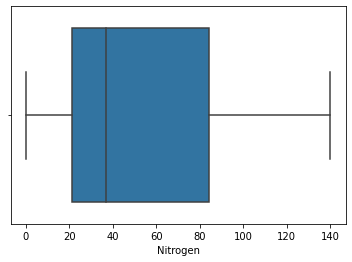

In [ ]:
# Check for outliers

# Nitrogen
sns.boxplot(x=data['Nitrogen'])

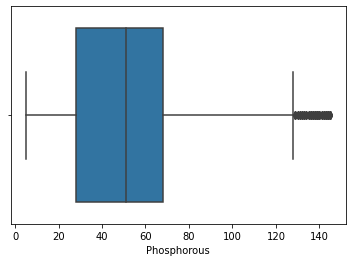

In [ ]:
# Check for outliers

# Phosphorous
sns.boxplot(x=data['Phosphorous'])

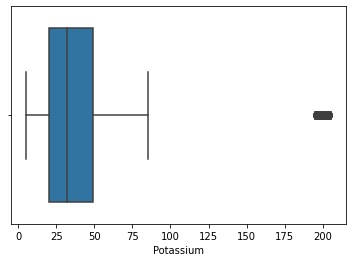

In [ ]:
# Check for outliers

# Potassium
sns.boxplot(x=data['Potassium'])

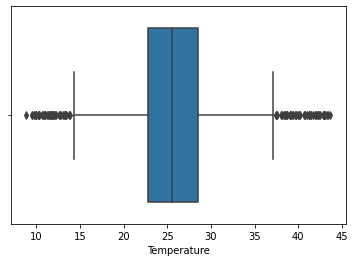

In [ ]:
# Check for outliers

# Temperature
sns.boxplot(x=data['Temperature'])

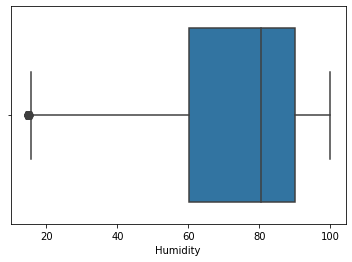

In [ ]:
# Check for outliers

# Humidity
sns.boxplot(x=data['Humidity'])

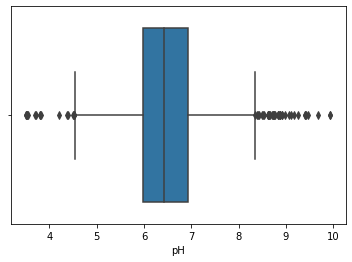

In [ ]:
# Check for outliers

# pH
sns.boxplot(x=data['pH'])

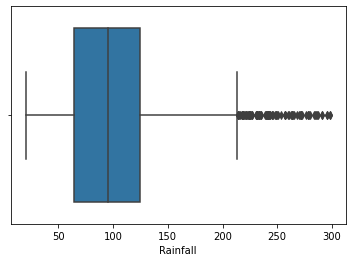

In [ ]:
# Check for outliers

# Rainfall
sns.boxplot(x=data['Rainfall'])

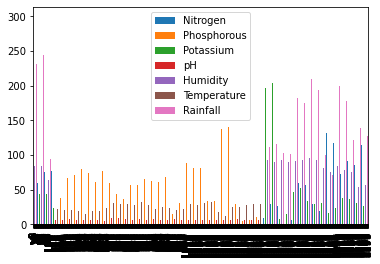

In [ ]:
# Data reshaping

# Display the scale/range of the numerical variables

data[['Nitrogen','Phosphorous','Potassium','pH','Humidity','Temperature','Rainfall']].plot(kind = 'bar')



In [ ]:
# Standardization

# Seperate the independent numerical variables from the dependent variable

X = data.drop(['Crop_Label'], axis = 1)
y = data['Crop_Label']

# Perform standardization
X = (X - X.mean())/X.std()

In [ ]:
data

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall,Crop_Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# Feature Engineering

data['pH_scale'] = ''

# Fill the new column with the pH scales

data.loc[data['pH'] < 7, 'pH_scale'] = 'Acid'
data.loc[data['pH'] == 7, 'pH_scale'] = 'Neutral'
data.loc[data['pH'] > 7, 'pH_scale'] = 'Alkali'



In [ ]:
data.head()

,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall,Crop_Label,pH_scale
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,Acid
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,Alkali
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,Alkali
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,Acid
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,Alkali


In [ ]:
# Rearrange

data = data[['Nitrogen', 'Phosphorous', 'Potassium', 'pH', 'pH_scale', 'Temperature', 'Humidity', 'Rainfall', 'Crop_Label']]

In [ ]:
data.head()

,Nitrogen,Phosphorous,Potassium,pH,pH_scale,Temperature,Humidity,Rainfall,Crop_Label
0,90,42,43,6.502985,Acid,20.879744,82.002744,202.935536,rice
1,85,58,41,7.038096,Alkali,21.770462,80.319644,226.655537,rice
2,60,55,44,7.840207,Alkali,23.004459,82.320763,263.964248,rice
3,74,35,40,6.980401,Acid,26.491096,80.158363,242.864034,rice
4,78,42,42,7.628473,Alkali,20.130175,81.604873,262.717340,rice


In [ ]:
# Check if there is any variables needed to be removed

corr = data.corr()

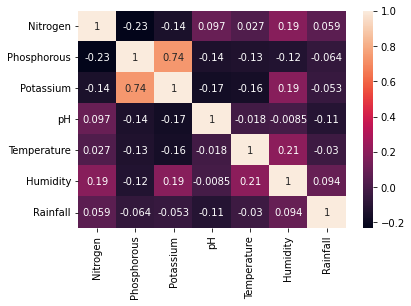

In [ ]:
# Plot the correlation matrix as heatmap

sns.heatmap(corr, annot = True)
plt.show()

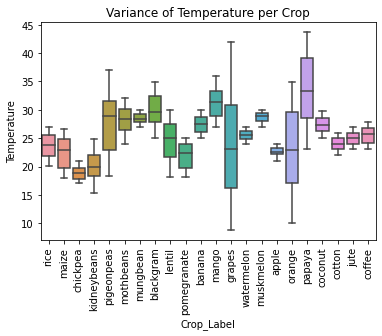

In [ ]:
# Data visualization

# Temperature

sns.boxplot(x = "Crop_Label", y="Temperature", data = data)
plt.xlabel("Crop_Label")
plt.xticks(rotation = 90)
plt.ylabel("Temperature")
plt.title("Variance of Temperature per Crop")

plt.show()


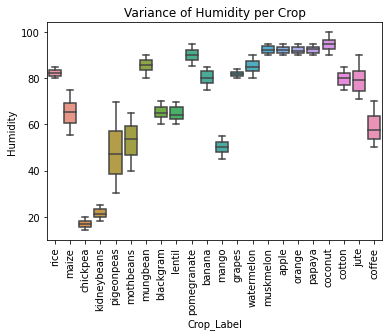

In [ ]:
# Humidity

sns.boxplot(x = "Crop_Label", y="Humidity", data = data)
plt.xlabel("Crop_Label")
plt.xticks(rotation = 90)
plt.ylabel("Humidity")
plt.title("Variance of Humidity per Crop")

plt.show()

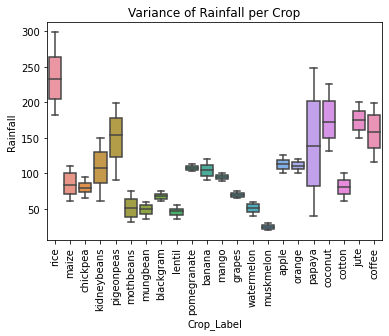

In [ ]:
# Rainfall

sns.boxplot(x = "Crop_Label", y="Rainfall", data = data)
plt.xlabel("Crop_Label")
plt.xticks(rotation = 90)
plt.ylabel("Rainfall")
plt.title("Variance of Rainfall per Crop")

plt.show()

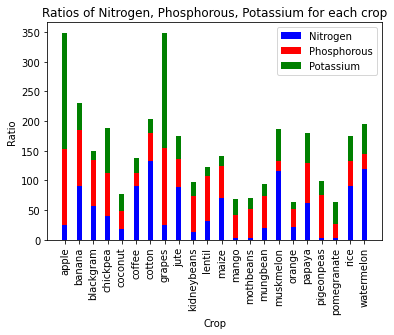

In [ ]:
# Impact of nutrients of the soil on the crop growth

# Create stacked bar plot

# Get the unique crop labels
crop_labels = np.sort(data['Crop_Label'].unique())

# Number of crops
num_crops = len(crop_labels)

# Get the nitrogen, phosphorous, and potassium ratios
nitrogen = [data[data['Crop_Label'] == label] ['Nitrogen'].values[0] for label in crop_labels]
phosphorous = [data[data['Crop_Label'] == label] ['Phosphorous'].values[0] for label in crop_labels]
potassium = [data[data['Crop_Label'] == label] ['Potassium'].values[0] for label in crop_labels]

# Create the stacked bar plot
x = np.arange(num_crops)
bar_width = 0.35

plt.bar(x, nitrogen, bar_width, color = 'blue')
plt.bar(x, phosphorous, bar_width, bottom = nitrogen, color = 'red')
plt.bar(x, potassium, bar_width, bottom = np.array(nitrogen) + np.array(phosphorous), color = 'green' )
plt.xticks(rotation = 90)

# Add labels and title
plt.xlabel('Crop')
plt.ylabel('Ratio')
plt.title('Ratios of Nitrogen, Phosphorous, Potassium for each crop')
plt.xticks(x, crop_labels)
plt.legend(['Nitrogen', 'Phosphorous', 'Potassium'])

plt.show()



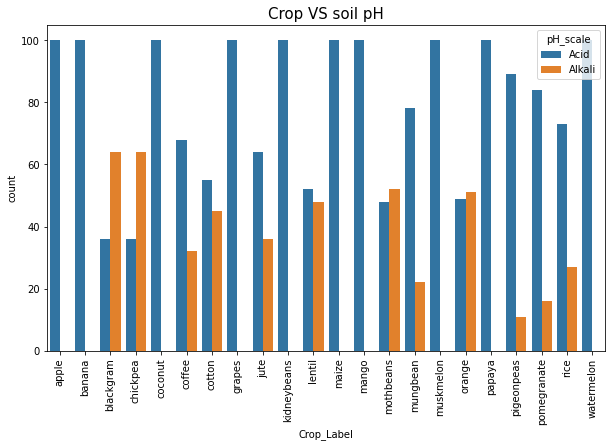

In [ ]:
# Visualizing the pH requirement of each crop

grouped = data.groupby (["Crop_Label", "pH_scale"]).size(). reset_index(name="count")

plt.figure(figsize = (10,6))
sns.barplot(x = "Crop_Label", y="count", hue="pH_scale", data = grouped)
plt.title("Crop VS soil pH", size = 15)
plt.xticks(rotation = 90)
plt.show()


In [ ]:
# Model selection
# cross validation

from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Train the models
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()

In [ ]:
# Perform 5-fold cross-validation

xgb_scores = cross_val_score(xgb_model, X, y, cv = 5)
rf_scores = cross_val_score(rf_model, X, y, cv = 5)
svm_scores = cross_val_score(svm_model, X, y, cv = 5)
dt_scores = cross_val_score(dt_model, X, y, cv = 5)
knn_scores = cross_val_score(knn_model, X, y, cv = 5)

In [ ]:
# Print the accuracy
print("XGBoost: {:.2f}%".format(xgb_scores.mean() * 100))
print("Random Forest: {:.2f}%".format(rf_scores.mean() * 100))
print("Support Vector Machine: {:.2f}%".format(svm_scores.mean() * 100))
print("Decision Tree: {:.2f}%".format(dt_scores.mean() * 100))
print("K Nearest Neighbors: {:.2f}%".format(knn_scores.mean() * 100))

XGBoost: 99.00%
Random Forest: 99.50%
Support Vector Machine: 98.23%
Decision Tree: 98.86%
K Nearest Neighbors: 97.14%


In [ ]:
# Drrop pH_scale column because it was created just for the data analysis (visualization) part. ITs not needed for modelling as we have already included pH info in numerical form.
data.drop('pH_scale', axis = 1, inplace = True)

In [ ]:
# Modelling and evaluation

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Encode the label column
data["Crop_Label"] = data["Crop_Label"].astype('category')
data["Crop_Label"] = data["Crop_Label"].cat.codes


# Seperate the dependent and independent variable

X = data.iloc[:, :-1].values
y = data["Crop_Label"].values

# Split the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
data

,Nitrogen,Phosphorous,Potassium,pH,Temperature,Humidity,Rainfall,Crop_Label
0,90,42,43,6.502985,20.879744,82.002744,202.935536,20
1,85,58,41,7.038096,21.770462,80.319644,226.655537,20
2,60,55,44,7.840207,23.004459,82.320763,263.964248,20
3,74,35,40,6.980401,26.491096,80.158363,242.864034,20
4,78,42,42,7.628473,20.130175,81.604873,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,6.780064,26.774637,66.413269,177.774507,5
2196,99,15,27,6.086922,27.417112,56.636362,127.924610,5
2197,118,33,30,6.362608,24.131797,67.225123,173.322839,5
2198,117,32,34,6.758793,26.272418,52.127394,127.175293,5


Accuracy: 96.36%
Precision: 96.50%
Recall: 96.36%


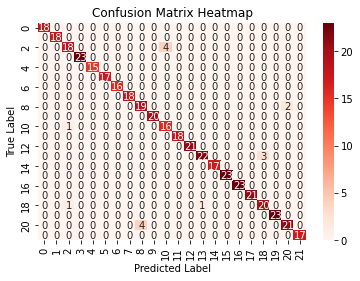

In [ ]:
# Model - Random Forest
from sklearn.metrics import precision_score, recall_score
# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average = 'weighted')
print("Precision: {:.2f}%".format(precision * 100))

# Recall
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Recall: {:.2f}%".format(recall * 100))

# Plot heatmap for confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Cleaned dataset

data.to_csv("Crop_Cleaned_data.csv", index = False)